Imports successful!
Pandas version: 2.3.3
NumPy version: 2.4.0
Matplotlib version: 3.10.8
APA/Elsevier style applied successfully!
Current working directory: /home/yam/Documents/PhD/python/notebooks
Looking for data in: /home/yam/Documents/PhD/python/data
Looking for figures in: /home/yam/Documents/PhD/python/figures
Data directory exists: True
Figures directory exists: True
✓ Data loaded successfully!
  Activities data: 9 rows × 5 columns
  Mixing enthalpy data: 9 rows × 3 columns
  Excess Gibbs data: 9 rows × 5 columns

First few rows of activities data:
   XMg  aLi_Linear_1000K  aMg_Linear_1000K  aLi_Exp_1000K  aMg_Exp_1000K
0  0.1             0.866             0.012          0.885          0.018
1  0.2             0.690             0.043          0.746          0.048
2  0.3             0.510             0.107          0.591          0.097
3  0.4             0.353             0.213          0.432          0.174
4  0.5             0.232             0.357          0.287          0.287

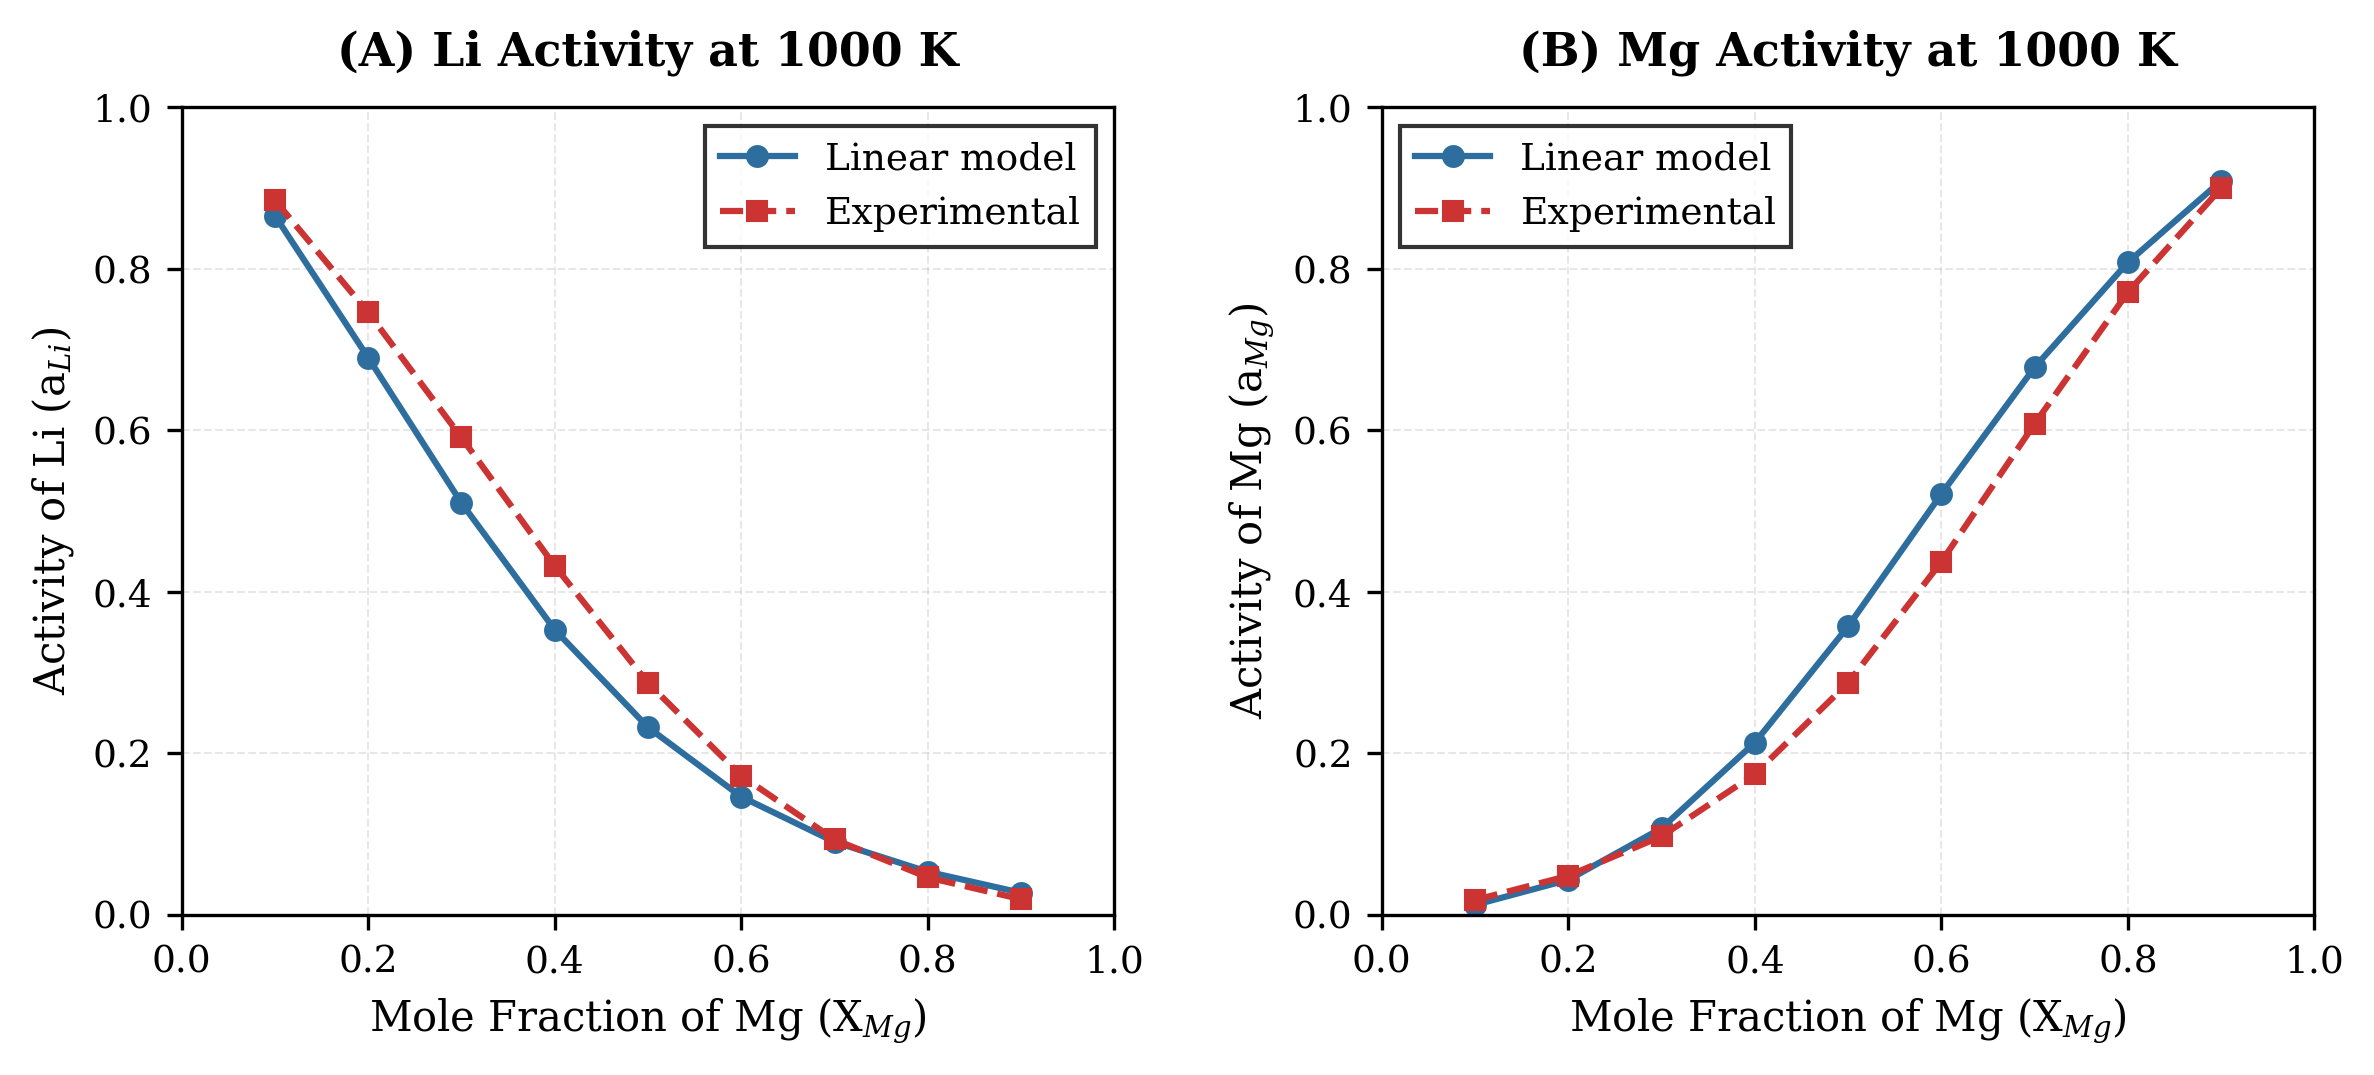

✓ Figure 2 saved to:
  PNG: /home/yam/Documents/PhD/python/figures/Fig2_mixing_enthalpy_1000K.png
  PDF: /home/yam/Documents/PhD/python/figures/Fig2_mixing_enthalpy_1000K.pdf


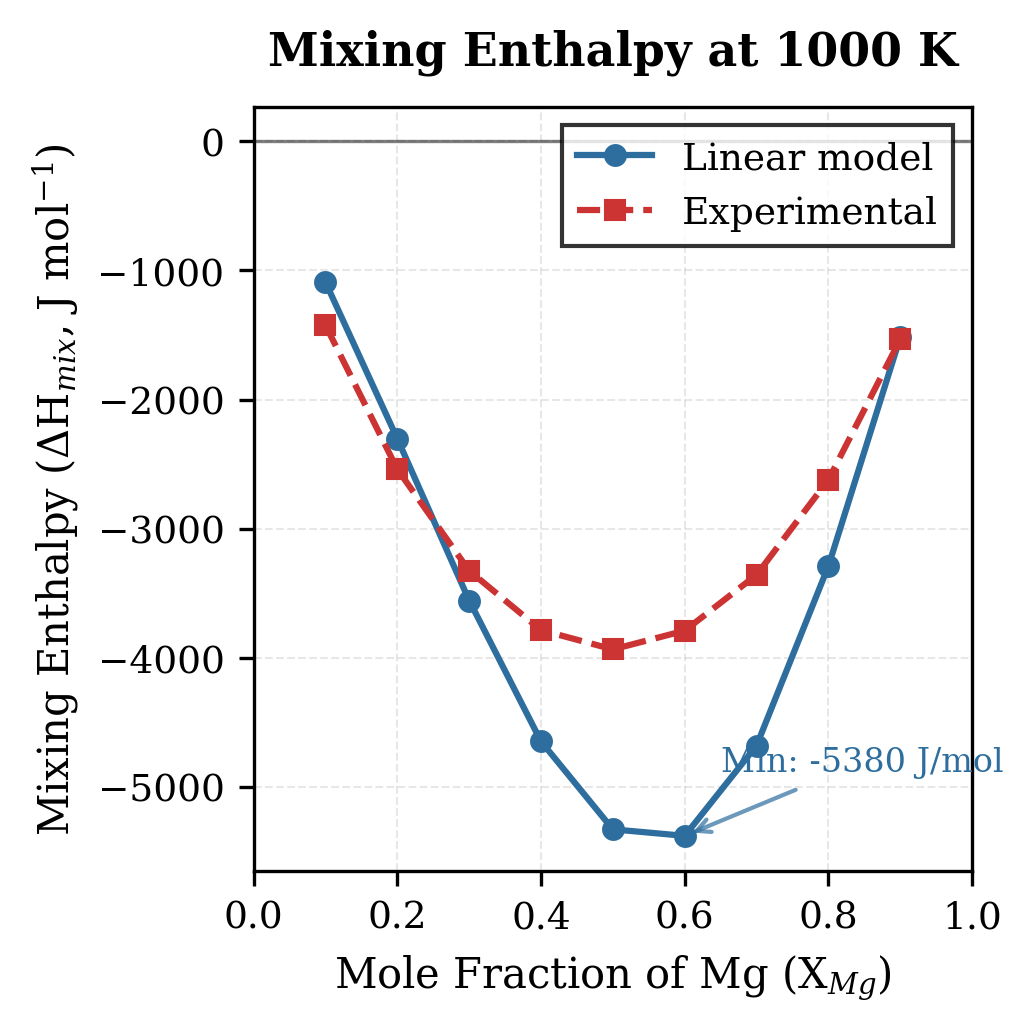

✓ Figure 3 saved to:
  PNG: /home/yam/Documents/PhD/python/figures/Fig3_excess_gibbs_comparison.png
  PDF: /home/yam/Documents/PhD/python/figures/Fig3_excess_gibbs_comparison.pdf


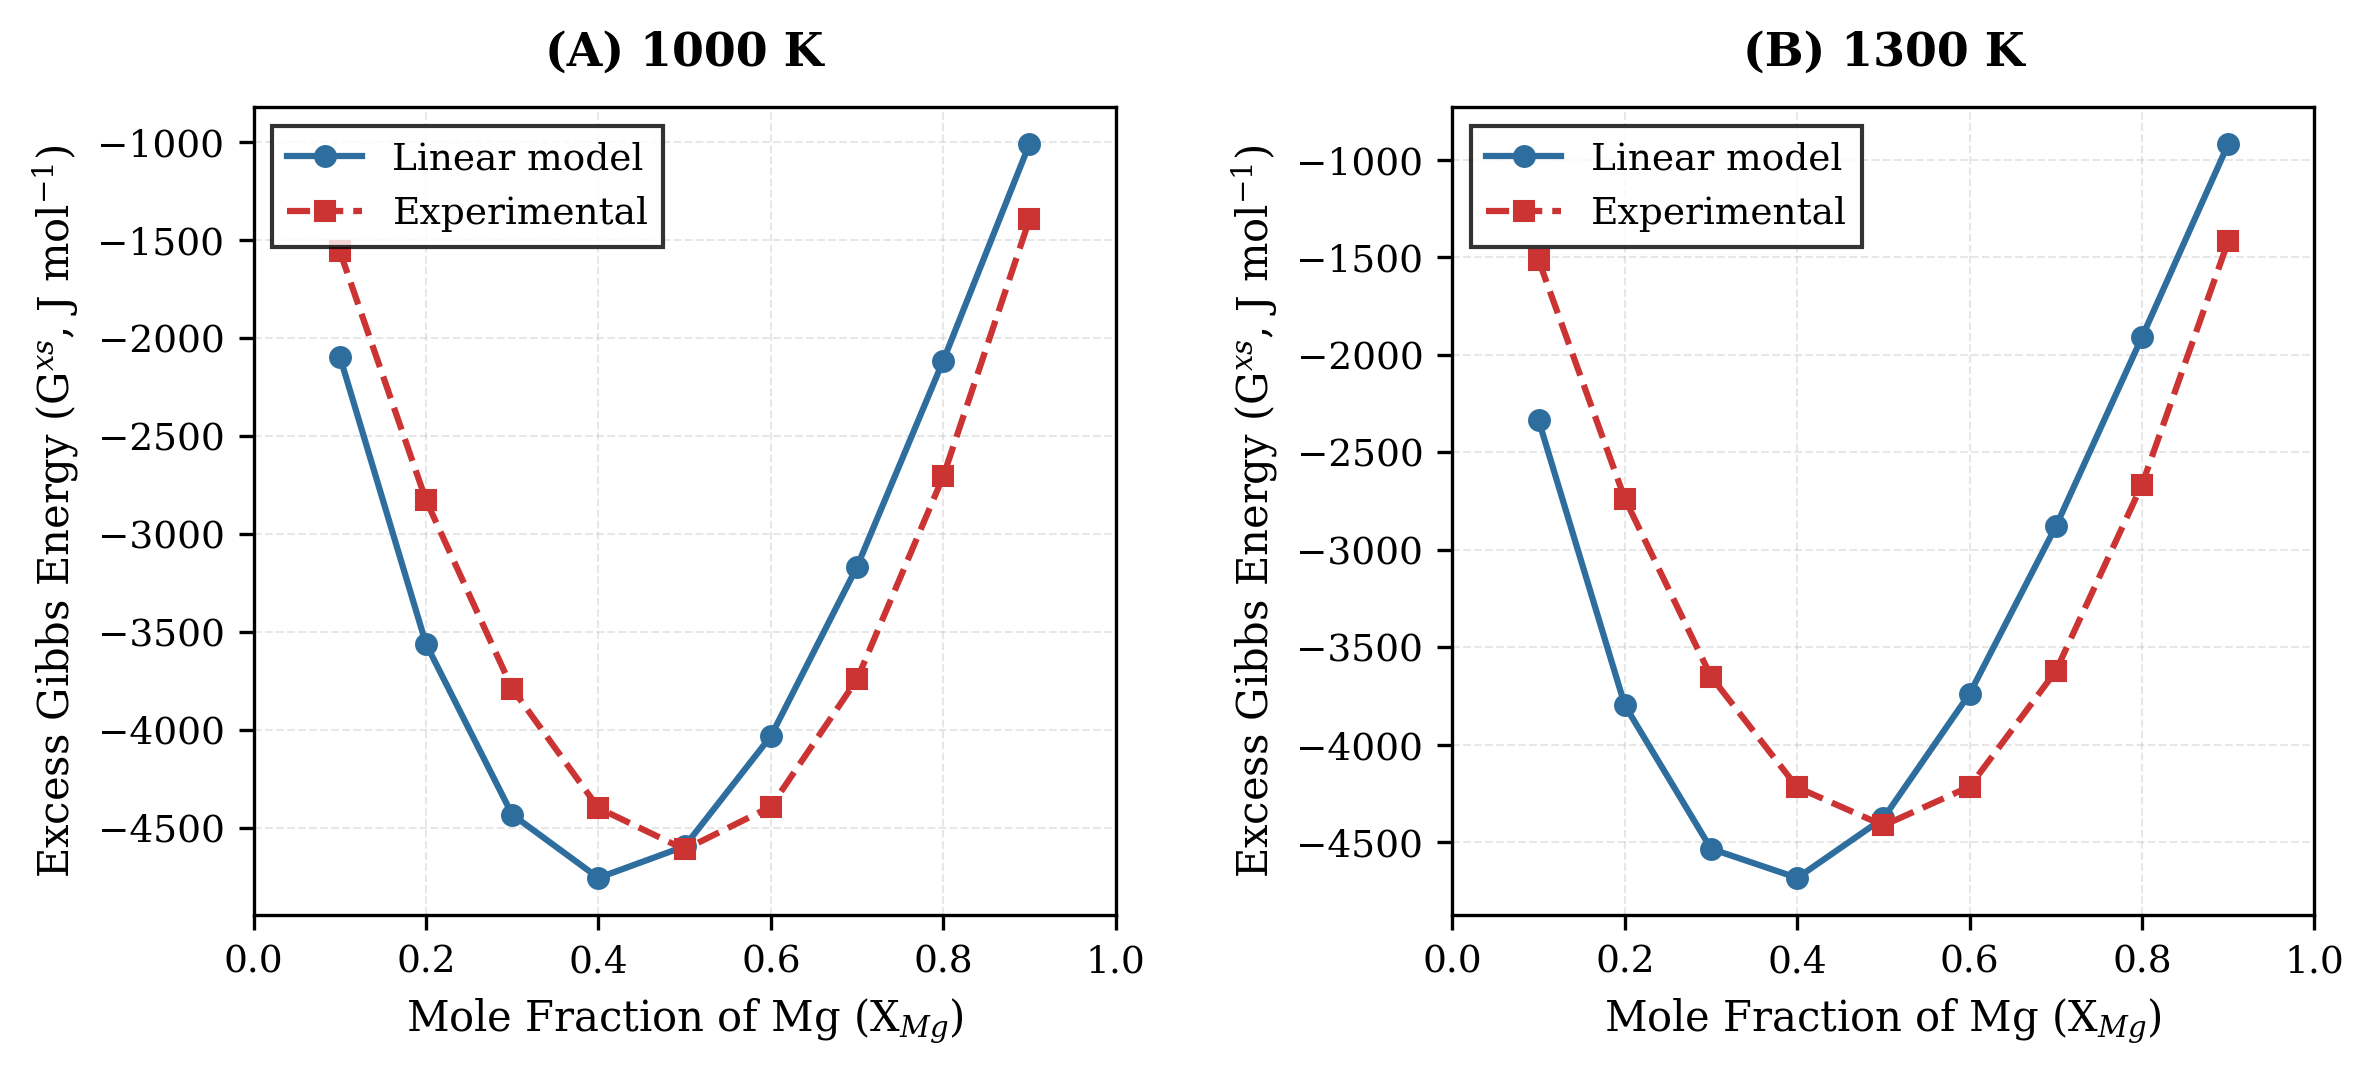

✓ Figure 4 saved to:
  PNG: /home/yam/Documents/PhD/python/figures/Fig4_comprehensive_comparison.png
  PDF: /home/yam/Documents/PhD/python/figures/Fig4_comprehensive_comparison.pdf


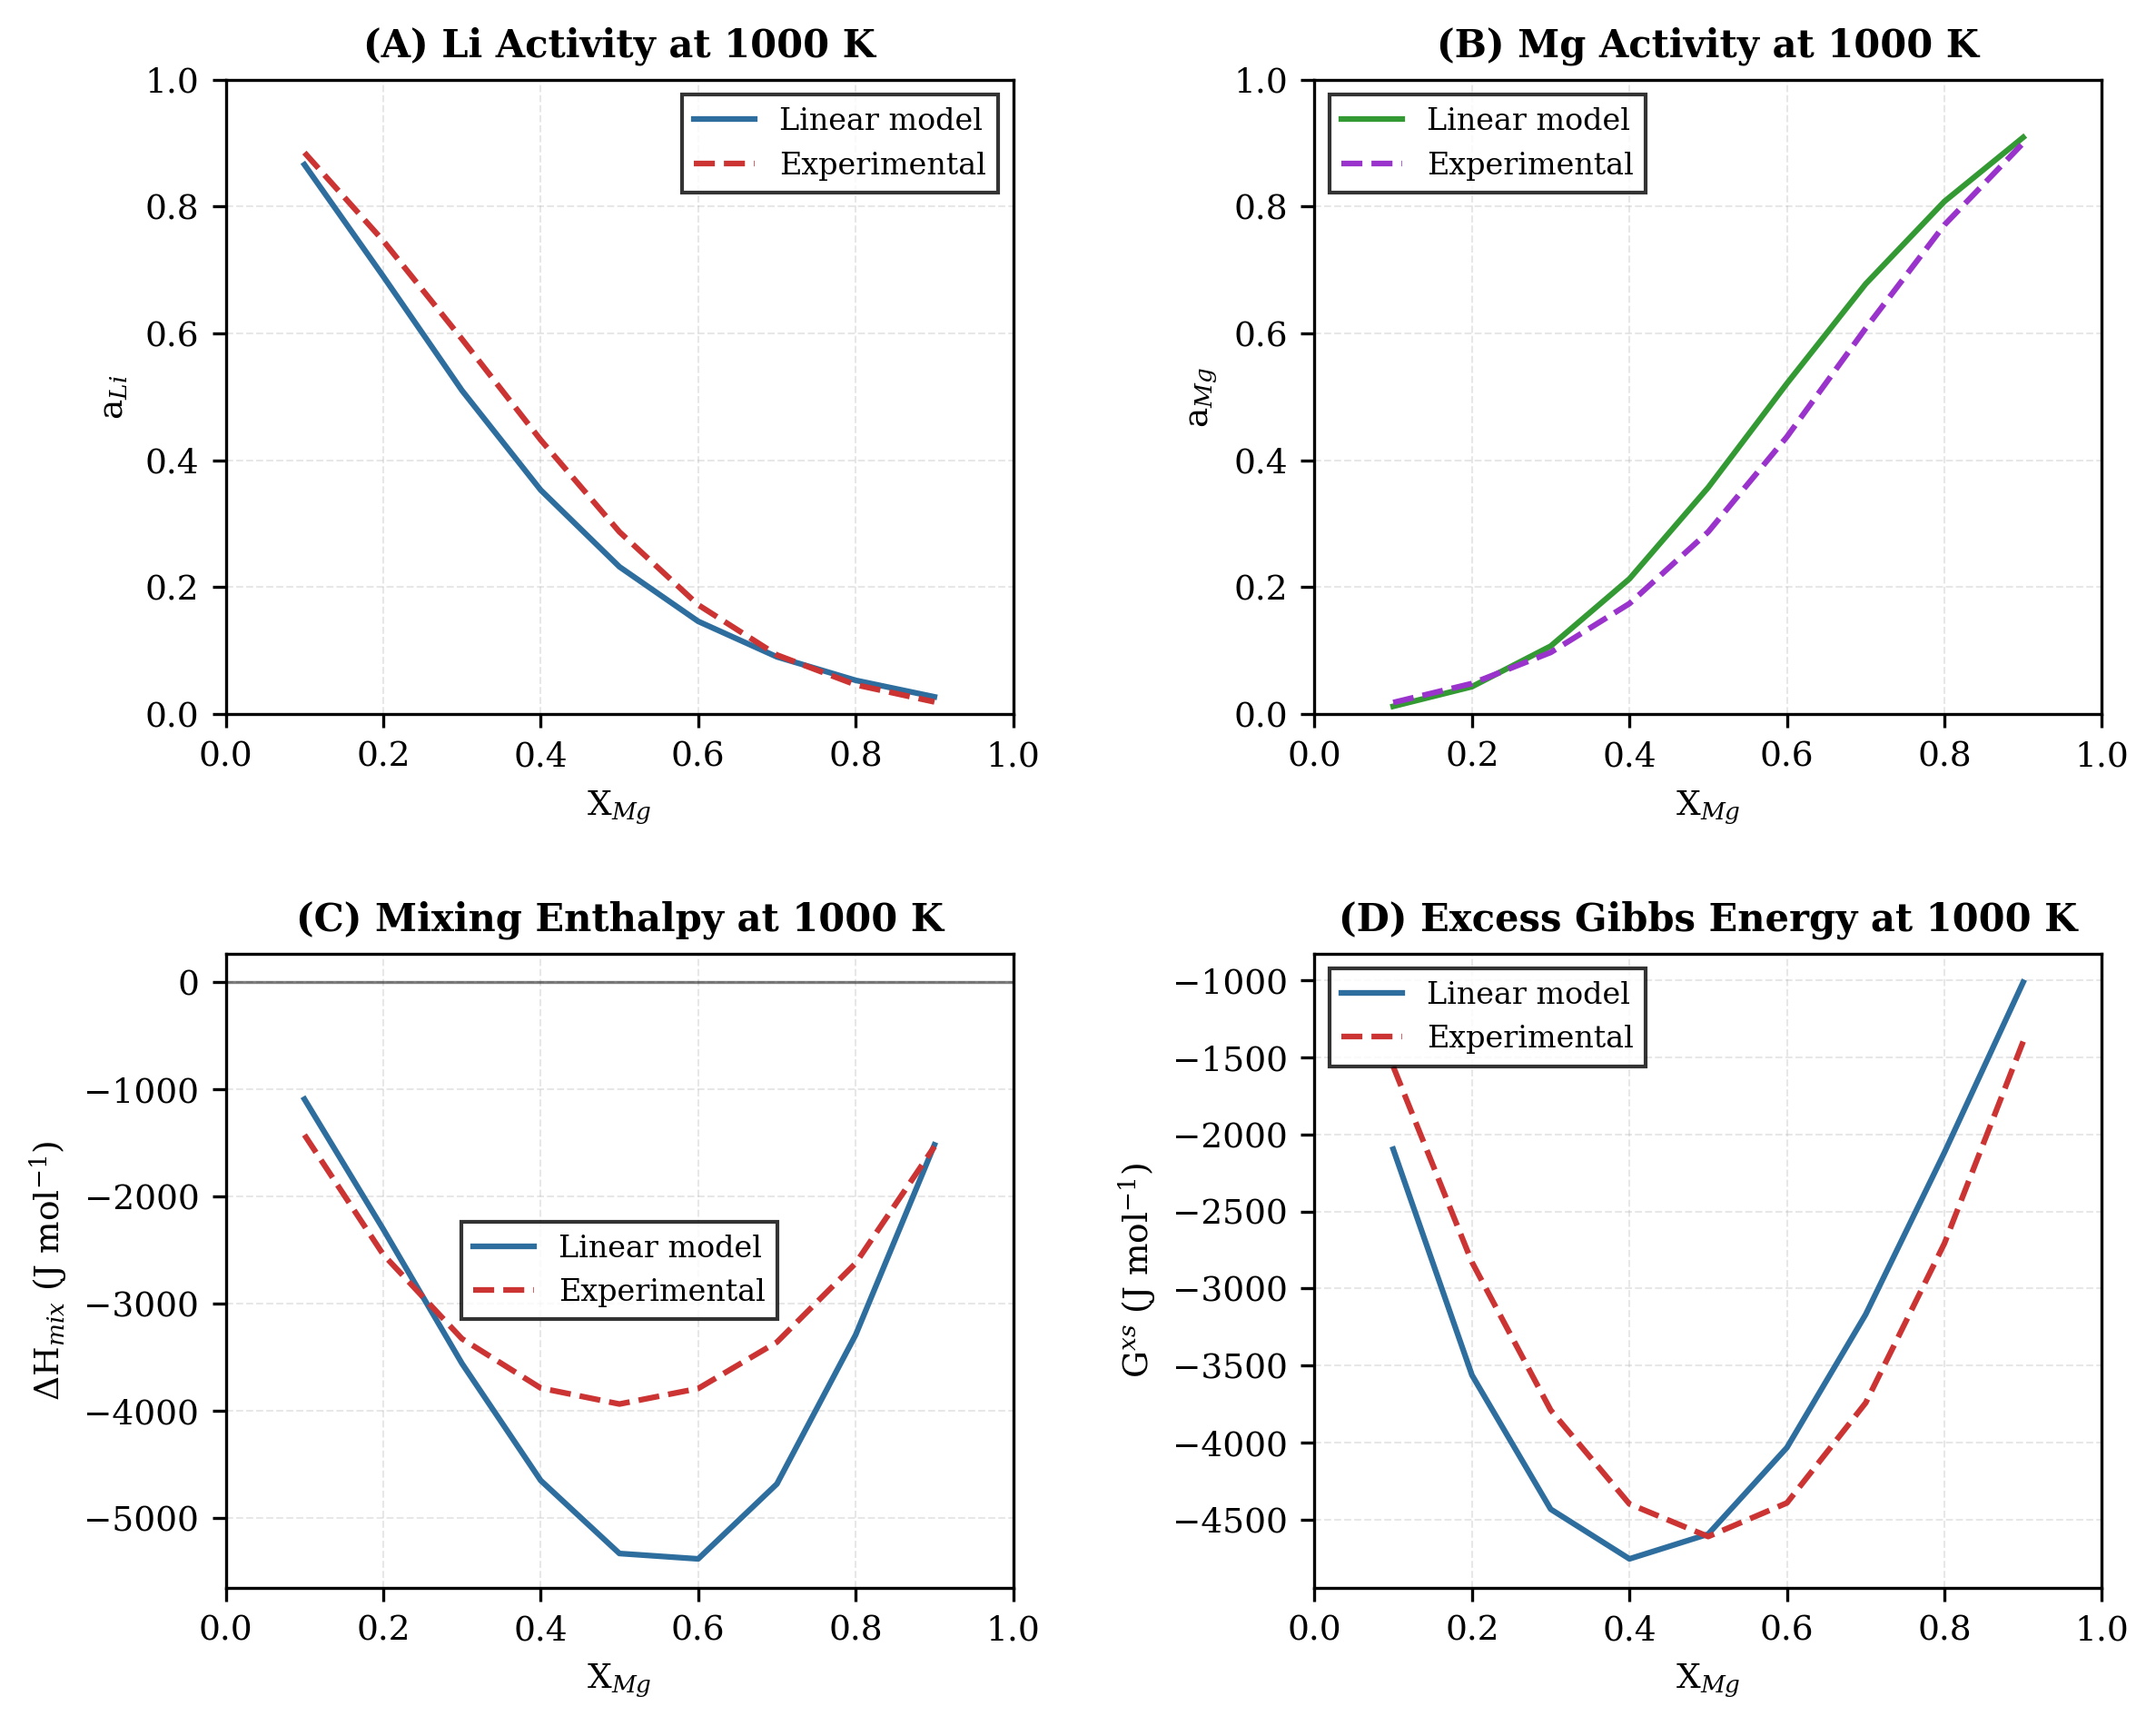

SUMMARY STATISTICS

1. Average Absolute Differences:
   Li activity: 0.0371
   Mg activity: 0.0367
   Mixing enthalpy: 739.2 J/mol

2. Maximum/Minimum Values:
   Max Li activity (Linear): 0.866
   Min Li activity (Linear): 0.027
   Max mixing enthalpy: -5379.7 J/mol at XMg = 0.6

3. Data Range:
   XMg range: 0.1 to 0.9
   Number of data points: 9

4. Summary table saved to: /home/yam/Documents/PhD/python/figures/Table_S1_summary_statistics.csv
✓ LaTeX table saved to: /home/yam/Documents/PhD/python/figures/Table_S1_latex_format.tex
ANALYSIS COMPLETE - SUMMARY

✓ Figures generated: 4
✓ Files saved to: /home/yam/Documents/PhD/python/figures

Generated files:
  Fig1_activities_1000K.png/pdf - Activities comparison
  Fig2_mixing_enthalpy_1000K.png/pdf - Mixing enthalpy
  Fig3_excess_gibbs_comparison.png/pdf - Temperature comparison
  Fig4_comprehensive_comparison.png/pdf - 2x2 comprehensive view
  Table_S1_summary_statistics.csv - Summary data
  Table_S1_latex_format.tex - LaTeX table for p

In [1]:
# %% [markdown]
# # Thermodynamic Analysis of Mg-Li System
# 
# ## Journal Quality Plots (APA/Elsevier Style)
# 

# %% [markdown]
# ## Import Required Libraries
# 

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
import os

print("Imports successful!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

# %% [markdown]
# ## Set APA/Elsevier Style Parameters
# 

# %%
# Configure matplotlib for APA/Elsevier journal style
def set_apa_style():
    """Configure matplotlib for APA/Elsevier journal style."""
    
    # Font settings (APA recommends Times New Roman or similar serif fonts)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif', 'Times', 'Liberation Serif']
    plt.rcParams['mathtext.fontset'] = 'dejavuserif'  # For math text
    
    # Font sizes (APA guidelines)
    plt.rcParams['font.size'] = 10  # Base font size
    plt.rcParams['axes.titlesize'] = 11  # Title font size
    plt.rcParams['axes.labelsize'] = 10  # Axis label font size
    plt.rcParams['xtick.labelsize'] = 9  # X-tick label size
    plt.rcParams['ytick.labelsize'] = 9  # Y-tick label size
    plt.rcParams['legend.fontsize'] = 9  # Legend font size
    
    # Line and marker settings
    plt.rcParams['lines.linewidth'] = 1.5  # Line width
    plt.rcParams['lines.markersize'] = 6  # Marker size
    plt.rcParams['lines.markeredgewidth'] = 0.5  # Marker edge width
    
    # Figure settings
    plt.rcParams['figure.dpi'] = 300  # High resolution
    plt.rcParams['figure.autolayout'] = False  # Manual layout control
    plt.rcParams['savefig.dpi'] = 600  # Save at high DPI for publications
    plt.rcParams['savefig.bbox'] = 'tight'  # Tight bounding box
    plt.rcParams['savefig.format'] = 'png'  # Can change to 'pdf' or 'tiff' for journals
    
    # Color cycle (distinct colors for publications)
    colors = ['#2E6E9E', '#CC3333', '#339933', '#9933CC', '#FF9900', '#33CCCC']
    plt.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)
    
    # Grid and axes
    plt.rcParams['axes.grid'] = True  # Show grid
    plt.rcParams['grid.alpha'] = 0.3  # Grid transparency
    plt.rcParams['grid.linestyle'] = '--'  # Grid line style
    plt.rcParams['grid.linewidth'] = 0.5  # Grid line width
    
    # Spines (keep all spines visible)
    plt.rcParams['axes.spines.top'] = True
    plt.rcParams['axes.spines.right'] = True
    
    # Error bars (if needed)
    plt.rcParams['errorbar.capsize'] = 3
    
    print("APA/Elsevier style applied successfully!")

# Apply APA style
set_apa_style()

# %% [markdown]
# ## Set Up Paths for Your Project Structure
# 

# %%
# Define paths based on your project structure
current_dir = Path.cwd()
print(f"Current working directory: {current_dir}")

# Check if we're in notebooks directory
if current_dir.name == "notebooks":
    data_dir = current_dir.parent / "data"
    figures_dir = current_dir.parent / "figures"
elif current_dir.name == "python":
    data_dir = current_dir / "data"
    figures_dir = current_dir / "figures"
else:
    # Try to find directories relative to current location
    data_dir = current_dir / "data"
    figures_dir = current_dir / "figures"
    
    # If not found, try going up one level
    if not data_dir.exists():
        data_dir = current_dir.parent / "data"
        figures_dir = current_dir.parent / "figures"

print(f"Looking for data in: {data_dir}")
print(f"Looking for figures in: {figures_dir}")

# Create figures directory if it doesn't exist
figures_dir.mkdir(parents=True, exist_ok=True)

# Check if directories exist
print(f"Data directory exists: {data_dir.exists()}")
print(f"Figures directory exists: {figures_dir.exists()}")

# %% [markdown]
# ## Load and Inspect Data
# 

# %%
# Load data files with error handling
try:
    activities_df = pd.read_csv(data_dir / "Table4_Activities.csv")
    hm_df = pd.read_csv(data_dir / "Table3_HM.csv")
    gxs_df = pd.read_csv(data_dir / "Table2_Gxs.csv")
    
    print("✓ Data loaded successfully!")
    print(f"  Activities data: {activities_df.shape[0]} rows × {activities_df.shape[1]} columns")
    print(f"  Mixing enthalpy data: {hm_df.shape[0]} rows × {hm_df.shape[1]} columns")
    print(f"  Excess Gibbs data: {gxs_df.shape[0]} rows × {gxs_df.shape[1]} columns")
    
    # Display first few rows
    print("\nFirst few rows of activities data:")
    print(activities_df.head())
    
except FileNotFoundError as e:
    print(f"✗ Error: Could not find data files in {data_dir}")
    print(f"  Please check: {data_dir}")
    # List files in data directory
    if data_dir.exists():
        print(f"\nFiles in {data_dir}:")
        for file in data_dir.iterdir():
            print(f"  - {file.name}")
except Exception as e:
    print(f"✗ Error loading data: {e}")

# %% [markdown]
# ## Figure 1: Activities at 1000K (Journal Quality)
# 

# %%
# Define colors and markers for consistent use
PUBLICATION_COLORS = ['#2E6E9E', '#CC3333', '#339933', '#9933CC', '#FF9900']  # Blue, Red, Green, Purple, Orange
MARKERS = ['o', 's', '^', 'D', 'v', '>']  # Circle, Square, Triangle up, Diamond, Triangle down

# Create figure with APA/Elsevier style
# Width: 8.27" (A4 width), Height: 3.94" - good for two-panel figures
fig1, axes = plt.subplots(1, 2, figsize=(8.27, 3.94))

# Panel A: Li Activities
ax1 = axes[0]
ax1.plot(activities_df['XMg'], activities_df['aLi_Linear_1000K'], 
         color=PUBLICATION_COLORS[0], marker=MARKERS[0], 
         linestyle='-', linewidth=1.5, markersize=5,
         label='Linear model', markeredgewidth=0.5)
ax1.plot(activities_df['XMg'], activities_df['aLi_Exp_1000K'], 
         color=PUBLICATION_COLORS[1], marker=MARKERS[1], 
         linestyle='--', linewidth=1.5, markersize=5,
         label='Experimental', markeredgewidth=0.5)

# APA/Elsevier style formatting
ax1.set_xlabel('Mole Fraction of Mg (X$_{Mg}$)', fontsize=10, fontweight='normal')
ax1.set_ylabel('Activity of Li (a$_{Li}$)', fontsize=10, fontweight='normal')
ax1.set_title('(A) Li Activity at 1000 K', fontsize=11, fontweight='bold', pad=10)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.set_xticks(np.arange(0, 1.1, 0.2))
ax1.set_yticks(np.arange(0, 1.1, 0.2))
ax1.legend(loc='best', frameon=True, fancybox=False, edgecolor='black', fontsize=9)
ax1.grid(True, linestyle='--', alpha=0.3)

# Panel B: Mg Activities
ax2 = axes[1]
ax2.plot(activities_df['XMg'], activities_df['aMg_Linear_1000K'], 
         color=PUBLICATION_COLORS[0], marker=MARKERS[0], 
         linestyle='-', linewidth=1.5, markersize=5,
         label='Linear model', markeredgewidth=0.5)
ax2.plot(activities_df['XMg'], activities_df['aMg_Exp_1000K'], 
         color=PUBLICATION_COLORS[1], marker=MARKERS[1], 
         linestyle='--', linewidth=1.5, markersize=5,
         label='Experimental', markeredgewidth=0.5)

ax2.set_xlabel('Mole Fraction of Mg (X$_{Mg}$)', fontsize=10, fontweight='normal')
ax2.set_ylabel('Activity of Mg (a$_{Mg}$)', fontsize=10, fontweight='normal')
ax2.set_title('(B) Mg Activity at 1000 K', fontsize=11, fontweight='bold', pad=10)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.set_xticks(np.arange(0, 1.1, 0.2))
ax2.set_yticks(np.arange(0, 1.1, 0.2))
ax2.legend(loc='best', frameon=True, fancybox=False, edgecolor='black', fontsize=9)
ax2.grid(True, linestyle='--', alpha=0.3)

# Adjust layout with proper padding
plt.tight_layout(pad=2.0)

# Save figure in multiple formats
fig1_path_png = figures_dir / "Fig1_activities_1000K.png"
fig1_path_pdf = figures_dir / "Fig1_activities_1000K.pdf"

fig1.savefig(fig1_path_png, dpi=600, bbox_inches='tight')
fig1.savefig(fig1_path_pdf, bbox_inches='tight')

print(f"✓ Figure 1 saved to:")
print(f"  PNG: {fig1_path_png}")
print(f"  PDF: {fig1_path_pdf}")
plt.show()

# %% [markdown]
# ## Figure 2: Mixing Enthalpy at 1000K (Single Column)
# 

# %%
# Single column figure for journal (3.54" = 8.5 cm width)
fig2, ax = plt.subplots(figsize=(3.54, 3.54))

# Plot data
ax.plot(hm_df['XMg'], hm_df['HM_Linear_1000K'], 
        color=PUBLICATION_COLORS[0], marker=MARKERS[0], 
        linestyle='-', linewidth=1.5, markersize=5,
        label='Linear model', markeredgewidth=0.5)
ax.plot(hm_df['XMg'], hm_df['HM_Exp_1000K'], 
        color=PUBLICATION_COLORS[1], marker=MARKERS[1], 
        linestyle='--', linewidth=1.5, markersize=5,
        label='Experimental', markeredgewidth=0.5)

# Zero reference line
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8, alpha=0.5)

# Formatting
ax.set_xlabel('Mole Fraction of Mg (X$_{Mg}$)', fontsize=10, fontweight='normal')
ax.set_ylabel('Mixing Enthalpy (ΔH$_{mix}$, J mol$^{-1}$)', fontsize=10, fontweight='normal')
ax.set_title('Mixing Enthalpy at 1000 K', fontsize=11, fontweight='bold', pad=10)
ax.set_xlim(0, 1)
ax.set_xticks(np.arange(0, 1.1, 0.2))
ax.legend(loc='best', frameon=True, fancybox=False, edgecolor='black', fontsize=9)
ax.grid(True, linestyle='--', alpha=0.3)

# Add annotation for minimum point
min_idx = hm_df['HM_Linear_1000K'].idxmin()
if not pd.isna(min_idx):
    min_val = hm_df.loc[min_idx, 'HM_Linear_1000K']
    min_x = hm_df.loc[min_idx, 'XMg']
    ax.annotate(f'Min: {min_val:.0f} J/mol', 
                xy=(min_x, min_val),
                xytext=(min_x+0.05, min_val+500),
                arrowprops=dict(arrowstyle='->', color=PUBLICATION_COLORS[0], alpha=0.7, linewidth=1),
                fontsize=8, color=PUBLICATION_COLORS[0], fontweight='normal')

plt.tight_layout()

# Save figure
fig2_path_png = figures_dir / "Fig2_mixing_enthalpy_1000K.png"
fig2_path_pdf = figures_dir / "Fig2_mixing_enthalpy_1000K.pdf"

fig2.savefig(fig2_path_png, dpi=600, bbox_inches='tight')
fig2.savefig(fig2_path_pdf, bbox_inches='tight')

print(f"✓ Figure 2 saved to:")
print(f"  PNG: {fig2_path_png}")
print(f"  PDF: {fig2_path_pdf}")
plt.show()

# %% [markdown]
# ## Figure 3: Excess Gibbs Free Energy Comparison (Two Temperatures)
# 

# %%
# Create figure comparing 1000K and 1300K
fig3, axes = plt.subplots(1, 2, figsize=(8.27, 3.94))

# Panel A: 1000K
ax1 = axes[0]
ax1.plot(gxs_df['XMg'], gxs_df['Gxs_Linear_1000K'], 
         color=PUBLICATION_COLORS[0], marker=MARKERS[0], 
         linestyle='-', linewidth=1.5, markersize=5,
         label='Linear model', markeredgewidth=0.5)
ax1.plot(gxs_df['XMg'], gxs_df['Gxs_Exp_1000K'], 
         color=PUBLICATION_COLORS[1], marker=MARKERS[1], 
         linestyle='--', linewidth=1.5, markersize=5,
         label='Experimental', markeredgewidth=0.5)

ax1.set_xlabel('Mole Fraction of Mg (X$_{Mg}$)', fontsize=10, fontweight='normal')
ax1.set_ylabel('Excess Gibbs Energy (G$^{xs}$, J mol$^{-1}$)', fontsize=10, fontweight='normal')
ax1.set_title('(A) 1000 K', fontsize=11, fontweight='bold', pad=10)
ax1.set_xlim(0, 1)
ax1.legend(loc='best', frameon=True, fancybox=False, edgecolor='black', fontsize=9)
ax1.grid(True, linestyle='--', alpha=0.3)

# Panel B: 1300K
ax2 = axes[1]
ax2.plot(gxs_df['XMg'], gxs_df['Gxs_Linear_1300K'], 
         color=PUBLICATION_COLORS[0], marker=MARKERS[0], 
         linestyle='-', linewidth=1.5, markersize=5,
         label='Linear model', markeredgewidth=0.5)
ax2.plot(gxs_df['XMg'], gxs_df['Gxs_Exp_1300K'], 
         color=PUBLICATION_COLORS[1], marker=MARKERS[1], 
         linestyle='--', linewidth=1.5, markersize=5,
         label='Experimental', markeredgewidth=0.5)

ax2.set_xlabel('Mole Fraction of Mg (X$_{Mg}$)', fontsize=10, fontweight='normal')
ax2.set_ylabel('Excess Gibbs Energy (G$^{xs}$, J mol$^{-1}$)', fontsize=10, fontweight='normal')
ax2.set_title('(B) 1300 K', fontsize=11, fontweight='bold', pad=10)
ax2.set_xlim(0, 1)
ax2.legend(loc='best', frameon=True, fancybox=False, edgecolor='black', fontsize=9)
ax2.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout(pad=2.0)

# Save figure
fig3_path_png = figures_dir / "Fig3_excess_gibbs_comparison.png"
fig3_path_pdf = figures_dir / "Fig3_excess_gibbs_comparison.pdf"

fig3.savefig(fig3_path_png, dpi=600, bbox_inches='tight')
fig3.savefig(fig3_path_pdf, bbox_inches='tight')

print(f"✓ Figure 3 saved to:")
print(f"  PNG: {fig3_path_png}")
print(f"  PDF: {fig3_path_pdf}")
plt.show()

# %% [markdown]
# ## Figure 4: Comprehensive Comparison (2x2 Grid)
# 

# %%
# Create a comprehensive 2x2 figure
fig4, axes = plt.subplots(2, 2, figsize=(8.27, 6.69))  # Full page size

# Define line styles for better distinction
LINE_STYLES = ['-', '--', '-.', ':']

# 1. Li Activities (Top Left)
ax1 = axes[0, 0]
ax1.plot(activities_df['XMg'], activities_df['aLi_Linear_1000K'], 
         color=PUBLICATION_COLORS[0], linestyle=LINE_STYLES[0], linewidth=1.5,
         label='Linear model')
ax1.plot(activities_df['XMg'], activities_df['aLi_Exp_1000K'], 
         color=PUBLICATION_COLORS[1], linestyle=LINE_STYLES[1], linewidth=1.5,
         label='Experimental')
ax1.set_xlabel('X$_{Mg}$', fontsize=9)
ax1.set_ylabel('a$_{Li}$', fontsize=9)
ax1.set_title('(A) Li Activity at 1000 K', fontsize=10, fontweight='bold')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.legend(loc='best', fontsize=8, frameon=True, fancybox=False, edgecolor='black')
ax1.grid(True, linestyle='--', alpha=0.3)

# 2. Mg Activities (Top Right)
ax2 = axes[0, 1]
ax2.plot(activities_df['XMg'], activities_df['aMg_Linear_1000K'], 
         color=PUBLICATION_COLORS[2], linestyle=LINE_STYLES[0], linewidth=1.5,
         label='Linear model')
ax2.plot(activities_df['XMg'], activities_df['aMg_Exp_1000K'], 
         color=PUBLICATION_COLORS[3], linestyle=LINE_STYLES[1], linewidth=1.5,
         label='Experimental')
ax2.set_xlabel('X$_{Mg}$', fontsize=9)
ax2.set_ylabel('a$_{Mg}$', fontsize=9)
ax2.set_title('(B) Mg Activity at 1000 K', fontsize=10, fontweight='bold')
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.legend(loc='best', fontsize=8, frameon=True, fancybox=False, edgecolor='black')
ax2.grid(True, linestyle='--', alpha=0.3)

# 3. Mixing Enthalpy (Bottom Left)
ax3 = axes[1, 0]
ax3.plot(hm_df['XMg'], hm_df['HM_Linear_1000K'], 
         color=PUBLICATION_COLORS[0], linestyle=LINE_STYLES[0], linewidth=1.5,
         label='Linear model')
ax3.plot(hm_df['XMg'], hm_df['HM_Exp_1000K'], 
         color=PUBLICATION_COLORS[1], linestyle=LINE_STYLES[1], linewidth=1.5,
         label='Experimental')
ax3.axhline(y=0, color='black', linestyle='-', linewidth=0.8, alpha=0.5)
ax3.set_xlabel('X$_{Mg}$', fontsize=9)
ax3.set_ylabel('ΔH$_{mix}$ (J mol$^{-1}$)', fontsize=9)
ax3.set_title('(C) Mixing Enthalpy at 1000 K', fontsize=10, fontweight='bold')
ax3.set_xlim(0, 1)
ax3.legend(loc='best', fontsize=8, frameon=True, fancybox=False, edgecolor='black')
ax3.grid(True, linestyle='--', alpha=0.3)

# 4. Excess Gibbs at 1000K (Bottom Right)
ax4 = axes[1, 1]
ax4.plot(gxs_df['XMg'], gxs_df['Gxs_Linear_1000K'], 
         color=PUBLICATION_COLORS[0], linestyle=LINE_STYLES[0], linewidth=1.5,
         label='Linear model')
ax4.plot(gxs_df['XMg'], gxs_df['Gxs_Exp_1000K'], 
         color=PUBLICATION_COLORS[1], linestyle=LINE_STYLES[1], linewidth=1.5,
         label='Experimental')
ax4.set_xlabel('X$_{Mg}$', fontsize=9)
ax4.set_ylabel('G$^{xs}$ (J mol$^{-1}$)', fontsize=9)
ax4.set_title('(D) Excess Gibbs Energy at 1000 K', fontsize=10, fontweight='bold')
ax4.set_xlim(0, 1)
ax4.legend(loc='best', fontsize=8, frameon=True, fancybox=False, edgecolor='black')
ax4.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout(pad=2.0)

# Save figure
fig4_path_png = figures_dir / "Fig4_comprehensive_comparison.png"
fig4_path_pdf = figures_dir / "Fig4_comprehensive_comparison.pdf"

fig4.savefig(fig4_path_png, dpi=600, bbox_inches='tight')
fig4.savefig(fig4_path_pdf, bbox_inches='tight')

print(f"✓ Figure 4 saved to:")
print(f"  PNG: {fig4_path_png}")
print(f"  PDF: {fig4_path_pdf}")
plt.show()

# %% [markdown]
# ## Create Summary Statistics Table
# 

# %%
# Calculate summary statistics
print("=" * 70)
print("SUMMARY STATISTICS")
print("=" * 70)

# Calculate differences
activities_df['aLi_diff'] = abs(activities_df['aLi_Linear_1000K'] - activities_df['aLi_Exp_1000K'])
activities_df['aMg_diff'] = abs(activities_df['aMg_Linear_1000K'] - activities_df['aMg_Exp_1000K'])
hm_df['HM_diff'] = abs(hm_df['HM_Linear_1000K'] - hm_df['HM_Exp_1000K'])

print(f"\n1. Average Absolute Differences:")
print(f"   Li activity: {activities_df['aLi_diff'].mean():.4f}")
print(f"   Mg activity: {activities_df['aMg_diff'].mean():.4f}")
print(f"   Mixing enthalpy: {hm_df['HM_diff'].mean():.1f} J/mol")

print(f"\n2. Maximum/Minimum Values:")
print(f"   Max Li activity (Linear): {activities_df['aLi_Linear_1000K'].max():.3f}")
print(f"   Min Li activity (Linear): {activities_df['aLi_Linear_1000K'].min():.3f}")
print(f"   Max mixing enthalpy: {hm_df['HM_Linear_1000K'].min():.1f} J/mol at XMg = {hm_df.loc[hm_df['HM_Linear_1000K'].idxmin(), 'XMg']}")

print(f"\n3. Data Range:")
print(f"   XMg range: {activities_df['XMg'].min()} to {activities_df['XMg'].max()}")
print(f"   Number of data points: {len(activities_df)}")

# Create summary table
summary_data = {
    'XMg': activities_df['XMg'],
    'aLi_Linear': activities_df['aLi_Linear_1000K'].round(3),
    'aLi_Exp': activities_df['aLi_Exp_1000K'].round(3),
    'aLi_Diff': activities_df['aLi_diff'].round(4),
    'aMg_Linear': activities_df['aMg_Linear_1000K'].round(3),
    'aMg_Exp': activities_df['aMg_Exp_1000K'].round(3),
    'aMg_Diff': activities_df['aMg_diff'].round(4),
    'ΔHmix_Linear': hm_df['HM_Linear_1000K'].round(1),
    'ΔHmix_Exp': hm_df['HM_Exp_1000K'].round(1),
    'ΔHmix_Diff': hm_df['HM_diff'].round(1),
    'Gxs_1000K_Linear': gxs_df['Gxs_Linear_1000K'].round(1),
    'Gxs_1000K_Exp': gxs_df['Gxs_Exp_1000K'].round(1)
}

summary_df = pd.DataFrame(summary_data)
summary_path = figures_dir / "Table_S1_summary_statistics.csv"
summary_df.to_csv(summary_path, index=False)

print(f"\n4. Summary table saved to: {summary_path}")

# %% [markdown]
# ## Create LaTeX Table for Publication
# 

# %%
# Create a LaTeX-formatted table for publication
latex_table = summary_df.copy()
# Use raw strings (r'') to handle LaTeX backslashes properly
latex_table.columns = [
    r'$X_{\mathrm{Mg}}$',
    r'$a_{\mathrm{Li}}$ (Linear)',
    r'$a_{\mathrm{Li}}$ (Exp)',
    r'$\Delta a_{\mathrm{Li}}$',
    r'$a_{\mathrm{Mg}}$ (Linear)',
    r'$a_{\mathrm{Mg}}$ (Exp)',
    r'$\Delta a_{\mathrm{Mg}}$',
    r'$\Delta H_{\mathrm{mix}}$ (Linear, J mol$^{-1}$)',
    r'$\Delta H_{\mathrm{mix}}$ (Exp, J mol$^{-1}$)',
    r'$\Delta(\Delta H_{\mathrm{mix}})$ (J mol$^{-1}$)',
    r'$G^{\mathrm{xs}}$ (Linear, J mol$^{-1}$)',
    r'$G^{\mathrm{xs}}$ (Exp, J mol$^{-1}$)'
]

# Save LaTeX table
latex_path = figures_dir / "Table_S1_latex_format.tex"

# Create LaTeX table with proper formatting
latex_content = r"""\begin{table}[htbp]
\centering
\caption{Summary of thermodynamic properties for the Mg-Li system at 1000 K.}
\label{tab:thermodynamic_summary}
\small
\begin{tabular}{cccccccccccc}
\toprule
$X_{\mathrm{Mg}}$ & 
$a_{\mathrm{Li}}$ (Linear) & 
$a_{\mathrm{Li}}$ (Exp) & 
$\Delta a_{\mathrm{Li}}$ & 
$a_{\mathrm{Mg}}$ (Linear) & 
$a_{\mathrm{Mg}}$ (Exp) & 
$\Delta a_{\mathrm{Mg}}$ & 
$\Delta H_{\mathrm{mix}}$ (Linear) & 
$\Delta H_{\mathrm{mix}}$ (Exp) & 
$\Delta(\Delta H_{\mathrm{mix}})$ & 
$G^{\mathrm{xs}}$ (Linear) & 
$G^{\mathrm{xs}}$ (Exp) \\
& & & & & & & \multicolumn{2}{c}{(J mol$^{-1}$)} & (J mol$^{-1}$) & \multicolumn{2}{c}{(J mol$^{-1}$)} \\
\midrule
"""

# Add data rows
for _, row in summary_df.iterrows():
    row_str = " & ".join([f"{val}" for val in row.values])
    latex_content += row_str + r" \\" + "\n"

# Close the table
latex_content += r"""\bottomrule
\end{tabular}
\end{table}"""

# Write to file
with open(latex_path, 'w') as f:
    f.write(latex_content)

print(f"✓ LaTeX table saved to: {latex_path}")

# %% [markdown]
# ## Final Summary
# 

# %%
print("=" * 70)
print("ANALYSIS COMPLETE - SUMMARY")
print("=" * 70)

print(f"\n✓ Figures generated: 4")
print(f"✓ Files saved to: {figures_dir}")

print(f"\nGenerated files:")
print("  Fig1_activities_1000K.png/pdf - Activities comparison")
print("  Fig2_mixing_enthalpy_1000K.png/pdf - Mixing enthalpy")
print("  Fig3_excess_gibbs_comparison.png/pdf - Temperature comparison")
print("  Fig4_comprehensive_comparison.png/pdf - 2x2 comprehensive view")
print("  Table_S1_summary_statistics.csv - Summary data")
print("  Table_S1_latex_format.tex - LaTeX table for publication")

print(f"\n✓ Figure specifications:")
print("  - APA/Elsevier style formatting")
print("  - Times New Roman font family")
print("  - 600 DPI resolution")
print("  - Proper chemical notation")
print("  - Single (3.54\") and double (8.27\") column widths")

print(f"\n✓ Next steps:")
print("  1. Check figures in {figures_dir}")
print("  2. Use PDF format for vector graphics")
print("  3. Adjust colors/styles per specific journal requirements")
print("  4. Use LaTeX table in your manuscript")

# %% [markdown]
# ## Optional: Install Missing Packages
# 

# %%
# Check and install missing packages if needed
print("\nChecking for missing packages...")

missing_packages = []
try:
    import seaborn
except ImportError:
    missing_packages.append("seaborn")

if missing_packages:
    print(f"The following packages are missing: {missing_packages}")
    print("You can install them using:")
    for pkg in missing_packages:
        print(f"  !pip install {pkg}")
else:
    print("All required packages are installed!")

print("\n✓ Analysis complete! All figures and tables are ready for publication.")